In [1]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("diabetes.csv",index_col=0)

In [3]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [5]:
scaler = StandardScaler()

In [6]:
#from sklearn.preprocessing import LabelEncoder

In [7]:
#le = LabelEncoder()
#df['Gender'] = le.fit_transform(df['Gender'])  

In [8]:
scaler.fit(df.drop('Outcome',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_features = scaler.transform(df.drop('Outcome',axis=1))

In [10]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Outcome'],
                                                    test_size=0.30)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
pred = knn.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(confusion_matrix(y_test,pred))

[[131  20]
 [ 33  47]]


In [25]:
printaccuracy_score(y_test,pred))

0.7705627705627706


In [20]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

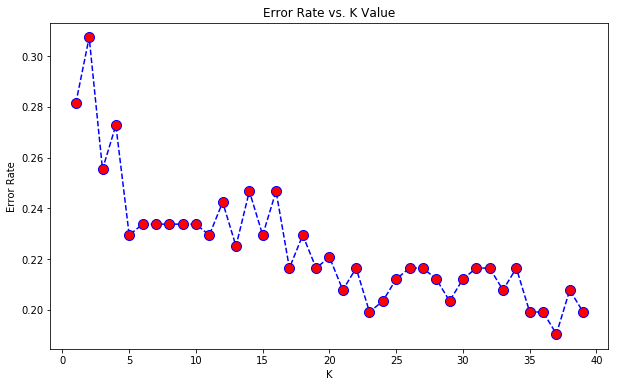

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')